# Visualization options

Different options are available to visualize a pore network. In this notebook we cover plotting in Spyder,interactive plots in Jupyter, and using Paraview software to visualize the network and simulation results.

In [1]:
%matplotlib inline
import os
current_directory = os.getcwd()
try:
    import plotly
except ModuleNotFoundError:
    !pip install plotly

## Spyder

[Spyder](https://www.spyder-ide.org/) is an open-source IDE for Python. The `Plots` pane in Spyder shows generated images and plots in `Console`. For more details see Spyder [Plots](https://docs.spyder-ide.org/current/panes/plots.html). As an example, let's run the following codes in Spyder's Editor and visualize the results:

In [2]:
import numpy as np
import openpnm as op
op.visualization.set_mpl_style()
import matplotlib.pyplot as plt
np.random.seed(10)

/home/amin/Code/OpenPNM/openpnm/algorithms/_invasion_percolation.py:358: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _find_trapped_pores(inv_seq, indices, indptr, outlets):  # pragma: no cover


We create a cubic network and visualize the network pores and throats using `plot_coordinates` and `plot_connections`. These functions are based on `matplotlib` functions and costumized for pore network visualization. Here the pores and throats are colored by the pores and throats diameter. The throats are shown as connections in a wireframe. We used `alpha` to create a more transparent color for throats. :

/home/amin/Code/OpenPNM/openpnm/visualization/_plottools.py:180: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


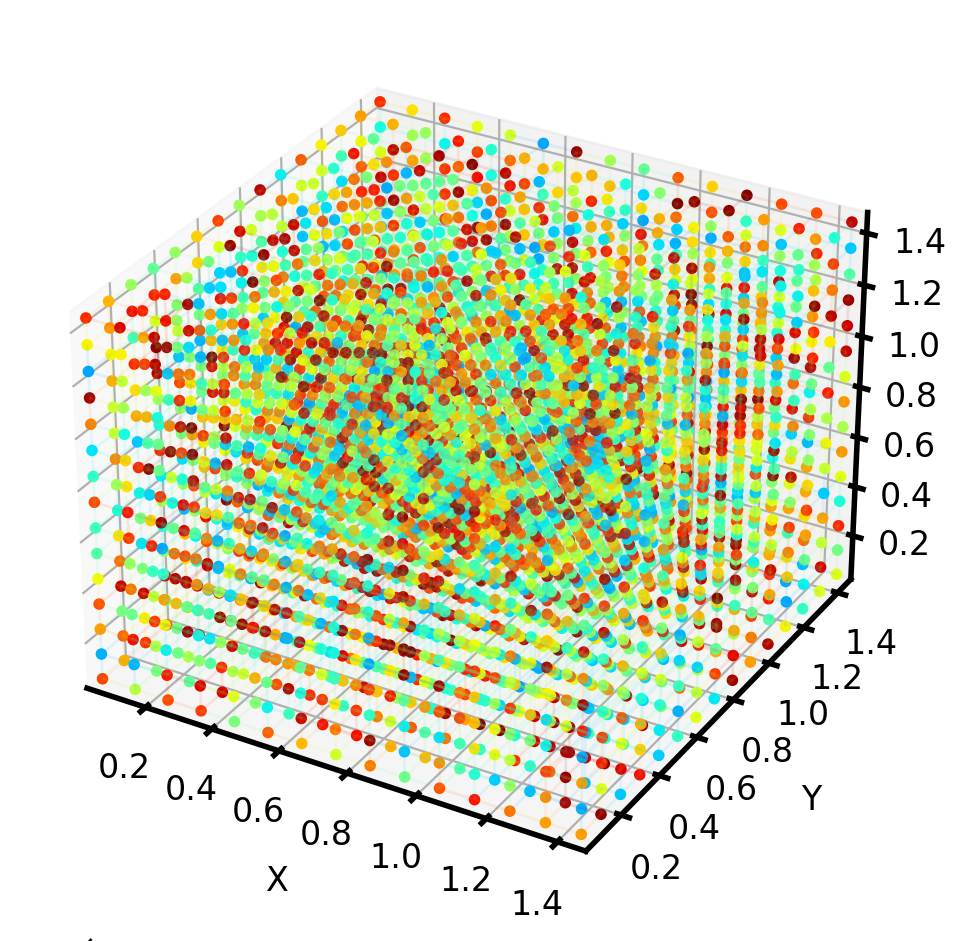

In [3]:
pn = op.network.Cubic(shape=[15, 15, 15], spacing=1e-6)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
ax = op.visualization.plot_coordinates(pn, color_by=pn['pore.diameter'])
ax = op.visualization.plot_connections(pn, ax=ax, color_by=pn['throat.diameter'], alpha=0.1)

The results from running in Spyder:

![image](https://github.com/PMEAL/OpenPNM/assets/14086031/52f3c628-ab3a-4fcf-aa50-84df92455b4c)

Other types of plots and examples such as histograms of data, plot coordinates and connections for extracted network, distribution of quantities in phase, etc can be generated and visualized in Spyder.

## Interactive plots in Jupyter notebook

The plots in Spyder and Jupyter notebook shown in previous examples are static.To create an interactive plot in Jupyter notebook we use [Plotly Python](https://plotly.com/python/), which is an interactive open-source library for plotting in Python. Plotly has different methods to plot data such as histogram, scatter plot, etc. When using Jupyter notebooks for pore network visualization, OpenPNM's costumized function `plot_notebook` (based on Plotly) can be used. Following shows an example. The resulting plot is interactive to (rotate, zoom, etc) and by hovering over pores their indice and coordinates will be shown in a box.

In [4]:
ax = op.visualization.plot_notebook(pn, node_color=pn['pore.diameter'], node_scale=10)
ax.show()

A sceenshot of the interactive plot is shown here:
![image](https://user-images.githubusercontent.com/43128873/188205979-bf89dc9e-29c8-4648-b8ac-fd83f97c9eef.png)

## Paraview

[Paraview](https://www.paraview.org/) is an open-source data analysis and visualization software. To visualize a network in Paraview, we first need to save the pore network data to a file type and format that is compatible with Paraview input file format. OpenPNM's `io`(input/output) class includes methods to export different types of data for use in different softwares. Here, we demonstrate an example of exporting the network to a `vtp` file for visualizing in Paraveiw. Note that by exporting the project using `project_to_vtk` method, both network and existing phases will be exported to a single `vtp` file. As a visualization example, let's apply a steady state Fickian diffusion algorithm on the generated network and find the concentration distribution on the network:

In [5]:
air = op.phase.Air(network=pn,name='air')
air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
inlet=pn.pores('left')
outlet=pn.pores('right')
Fd = op.algorithms.FickianDiffusion(network=pn, phase=air)
Fd.set_value_BC(pores=inlet, values=1)
Fd.set_value_BC(pores=outlet, values=0)
Fd.run()
air.update(Fd.soln)

[15:45:29] WARNING  throat.entry_pressure was not run since the following      ]8;id=782300;file:///home/amin/Code/OpenPNM/openpnm/core/_models.py\_models.py]8;;\:]8;id=520453;file:///home/amin/Code/OpenPNM/openpnm/core/_models.py#480\480]8;;\
                    property is missing: 'throat.surface_tension'                            

Now we save the network data to a user-defined folder address and file_name. Here, we use the current directory as `path_to_file`:

In [6]:
path_to_file = current_directory
op.io._vtk.project_to_vtk(pn.project, filename=path_to_file+'/Paraview_net')

We can now import the generated file `Paraview_net.vtp` in Parview for visualization.

1) Import

2) Find the data and import

3) Click on Apply to visualize this settings (Click on this button after any time changes are applied for visualization)


![image](https://user-images.githubusercontent.com/43128873/188217820-42248077-f1e2-420f-91d5-f69a18c1f578.png)

The imported file contains the parameters computed by OpenPNM as shown in the Properties bar. To visualize pore data, we need to first create glyphs. 

4) Click on Glyph button in the tool bar

5) Change pore shapes to spheres , adjust size, color, and other settings

7) Click on Apply to visualize this settings

![image](https://user-images.githubusercontent.com/43128873/188220033-e2bb5f8d-d7b7-49af-ac6f-1d659dfd5f3f.png)

Final result shows spherical pores colored and scaled by pore diameter:

![image](https://user-images.githubusercontent.com/43128873/188220288-f6d7fda9-5703-4cb2-8166-16588f62601b.png)

To visualize the throats, we apply some filters on the originally imported object (Paraview_net). Click on Paraview_net.vtp object in Pipeline Browser. Then select following filters. Filters are available to select from Filters Tab> Alphabetical.

7) Apply Shrink filter with Shrink Factor=1.

8) Apply CellDatatoPointdata filter, which transposes cell data to the data point.

9) Apply ExtractSurface filter, which extracts the surface.

10) Apply Tube filter to plot the data as tubes, Adjust the settings for color and size of the throat

![image](https://user-images.githubusercontent.com/43128873/188224648-d44e2cb2-8d51-44e4-97c5-adbc40622e3e.png)

We can now visualize the throat data plotted with tubes radius proportional to throat diameter and tubes colour base on throat diameter:

![image](https://user-images.githubusercontent.com/43128873/188225224-5227d4a4-4017-4242-a0f2-d9533cbb6539.png)

To visualize both pores and throats, we select the eye icon next to the Glyph1 object. For a better visualization of sizes, we increased the Radius in Glyph1 properties from 0.5 to 0.75:

![image](https://user-images.githubusercontent.com/43128873/188225780-770016b8-490b-4fe4-a870-432df5b26fb3.png)

We can select other properties for visualization. To see the pore concentration values, we select a solid color for throats and select `pore.concentration` for pores.

11) Select Tube1 object, change the coloring to a solid color

12) Select the Glyph1 object, change the coloring to pore concentration

(Note:  We selected a solid color for throats, as we didn't define those values before saving the vtp file. In pore-scale model calculation, if throat quantity (for example concentration) is not assigned OpenPNM by default interpolates quantity values in throats based on its connected pores.). If throat concentration is assigned to the network, we can visualize them selecting `throat.concentration` in Coloring option of the Tube object.

![image](https://user-images.githubusercontent.com/43128873/188228017-cbcc852f-c901-49df-847d-1355c6df28a5.png)

This is the visualization result:

![image](https://user-images.githubusercontent.com/43128873/188229185-c34f8f7a-02a7-48da-adae-afb0b8a3c3e6.png)